In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
file_path = r'C:\Users\User\Desktop\webscraping with python\List of largest companies in the United States by revenue 2023.csv'
df = pd.read_csv(file_path)

In [3]:
# Dropping the Unnamed column in the first index column
df.drop(df.columns[0], axis=1, inplace=True)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth %,Employees,Headquarters,City,State
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington",Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnetonka,Minnesota
...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298,10.6,71100,"Richfield, Minnesota",Richfield,Minnesota
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159,0.5,34300,"New York City, New York",New York City,New York
97,98,United Airlines,Airline,44955,82.5,92795,"Chicago, Illinois",Chicago,Illinois
98,99,Thermo Fisher Scientific,Laboratory instruments,44915,14.5,130000,"Waltham, Massachusetts",Waltham,Massachusetts


In [4]:
# Setting the dataframe to full view
# pd.set_option('display.max.rows', 100)
# df

In [5]:
# Replacing wrong value in Employees column where company Name = StoneX Group
df['Employees'].mask(df['Employees'] == 40002, 4000, inplace=True)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth %,Employees,Headquarters,City,State
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas",Bentonville,Arkansas
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington",Seattle,Washington
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas",Spring,Texas
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California",Cupertino,California
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota",Minnetonka,Minnesota
...,...,...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,46298,10.6,71100,"Richfield, Minnesota",Richfield,Minnesota
96,97,Bristol-Myers Squibb,Pharmaceutical industry,46159,0.5,34300,"New York City, New York",New York City,New York
97,98,United Airlines,Airline,44955,82.5,92795,"Chicago, Illinois",Chicago,Illinois
98,99,Thermo Fisher Scientific,Laboratory instruments,44915,14.5,130000,"Waltham, Massachusetts",Waltham,Massachusetts


In [6]:
# Overview of the dataset
overview = {
    'Total Companies': len(df),
    'Unique Industries': df['Industry'].nunique(),
    'Revenue Range (USD millions)': [df['Revenue (USD millions)'].min(), df['Revenue (USD millions)'].max()],
    'Total Employees': df['Employees'].sum(),
    'States Represented': df['State'].nunique()
}

# Summary statistics for numerical columns
summary_statistics = df.describe()

overview

{'Total Companies': 100,
 'Unique Industries': 38,
 'Revenue Range (USD millions)': [44200, 611289],
 'Total Employees': 16806702,
 'States Represented': 28}

In [7]:
summary_statistics

,Rank,Revenue (USD millions),Revenue growth %,Employees
count,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,117566.460000,19.576000,1.680670e+05
std,29.011492,100915.112163,21.463397,2.717265e+05
min,1.000000,44200.000000,0.500000,3.616000e+03
25%,25.750000,57876.000000,4.375000,4.471150e+04
50%,50.500000,80824.500000,11.700000,8.963850e+04
75%,75.250000,138763.000000,23.625000,1.965125e+05
max,100.000000,611289.000000,97.200000,2.100000e+06


## Insights:
> -  The dataset represents a wide range of industries, from retail and healthcare to petroleum and electronics.
> -  There's a significant variation in company sizes, both in terms of revenue and employee count, indicating a mix of large multinational corporations and smaller, yet still significant, companies.
> -  The average revenue growth across these companies is 19.58%, with some companies experiencing growth as high as 97.2%.
> -  The total number of employees across all these companies is over 16 million, showcasing the significant employment these companies provide.

In [8]:
# 1. Top 10 Companies by Revenue
top_10_companies = df.sort_values('Revenue (USD millions)', ascending=False).head(10)

In [9]:
# 2. Industry Analysis - Top 10 Industries by Number of Companies and Total Revenue
industry_counts = df['Industry'].value_counts().head(10)  # By number of companies
total_revenue_by_industry = df.groupby('Industry')['Revenue (USD millions)'].sum().sort_values(ascending=False).head(10)  # By total revenue

In [10]:
# 3. Geographical Distribution of Companies - Top 10 States by Number of Companies
companies_by_state = df['State'].value_counts().head(10)

In [11]:
# 4. Revenue Growth Analysis - Top 10 Companies with Highest Revenue Growth
top_growth_companies = df.sort_values('Revenue growth %', ascending=False).head(10)

In [12]:
# Setting the visual style for seaborn
sns.set(style="whitegrid")

In [13]:
# Define the size of the text elements
sns.set_context('talk', font_scale=0.8)

In [14]:
# Plotting
plt.figure(figsize=(40, 30))

<Figure size 4000x3000 with 0 Axes>

<Figure size 4000x3000 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Companies by Revenue')

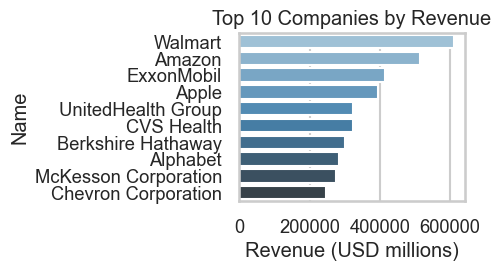

In [15]:
# Plot 1: Top 10 Companies by Revenue
plt.subplot(2, 2, 1)
sns.barplot(x='Revenue (USD millions)', y='Name', data=top_10_companies, palette='Blues_d')
plt.title('Top 10 Companies by Revenue')

> #### Top 10 Companies by Revenue: 
> Walmart, Amazon, ExxonMobil, Apple, and UnitedHealth Group lead the pack, showcasing their dominance in their respective industries.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Financials'),
  Text(1, 0, 'Retail'),
  Text(2, 0, 'Petroleum industry'),
  Text(3, 0, 'Pharmaceutical industry'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Insurance'),
  Text(6, 0, 'Technology'),
  Text(7, 0, 'Airline'),
  Text(8, 0, 'Telecommunications'),
  Text(9, 0, 'Technology and cloud computing')])

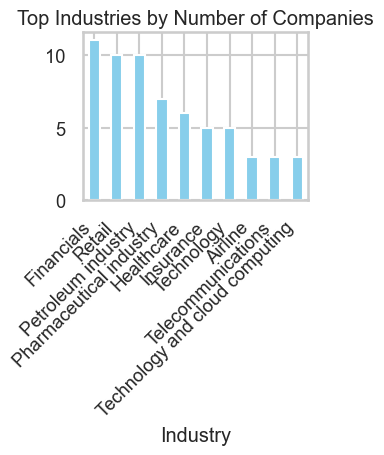

In [16]:
# Plot 2: Top Industries by Number of Companies
plt.subplot(2, 2, 2)
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Top Industries by Number of Companies')
plt.xticks(rotation=45, ha="right")

>  #### Top Industries by Number of Companies: 
> The visualization illustrates the industries with the highest representation among the largest companies, indicating sectors that are significant contributors to the US economy.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, ' New York'),
  Text(1, 0, ' Texas'),
  Text(2, 0, ' California'),
  Text(3, 0, ' Illinois'),
  Text(4, 0, ' Ohio'),
  Text(5, 0, ' Virginia'),
  Text(6, 0, ' Minnesota'),
  Text(7, 0, ' Massachusetts'),
  Text(8, 0, ' New Jersey'),
  Text(9, 0, ' Washington')])

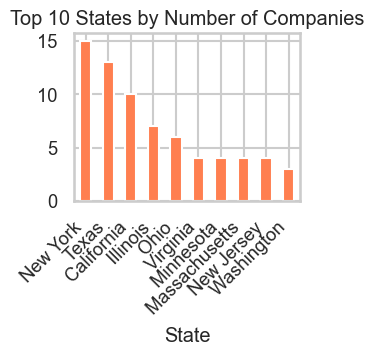

In [17]:
# Plot 3: Top 10 States by Number of Companies
plt.subplot(2, 2, 3)
companies_by_state.plot(kind='bar', color='coral')
plt.title('Top 10 States by Number of Companies')
plt.xticks(rotation=45, ha="right")

> #### Top 10 States by Number of Companies: 
> This graph highlights the states with the highest number of top revenue companies, showcasing geographical hubs of business and industry in the US.

Text(0.5, 1.0, 'Top 10 Companies by Revenue Growth %')

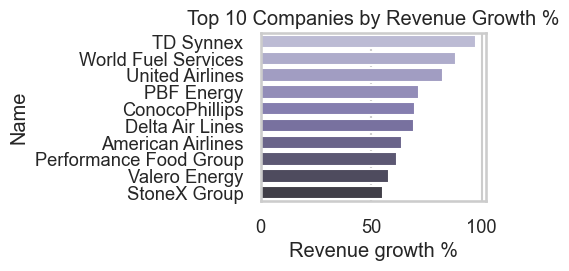

In [18]:
# Plot 4: Top 10 Companies by Revenue Growth %
plt.subplot(2, 2, 4)
sns.barplot(x='Revenue growth %', y='Name', data=top_growth_companies, palette='Purples_d')
plt.title('Top 10 Companies by Revenue Growth %')

> #### Top 10 Companies by Revenue Growth %: 
> The companies with the highest revenue growth percentage demonstrate sectors experiencing rapid expansion, which can be indicative of market trends and consumer demand shifts.

In [ ]:
plt.tight_layout(pad=2.0)
plt.show()

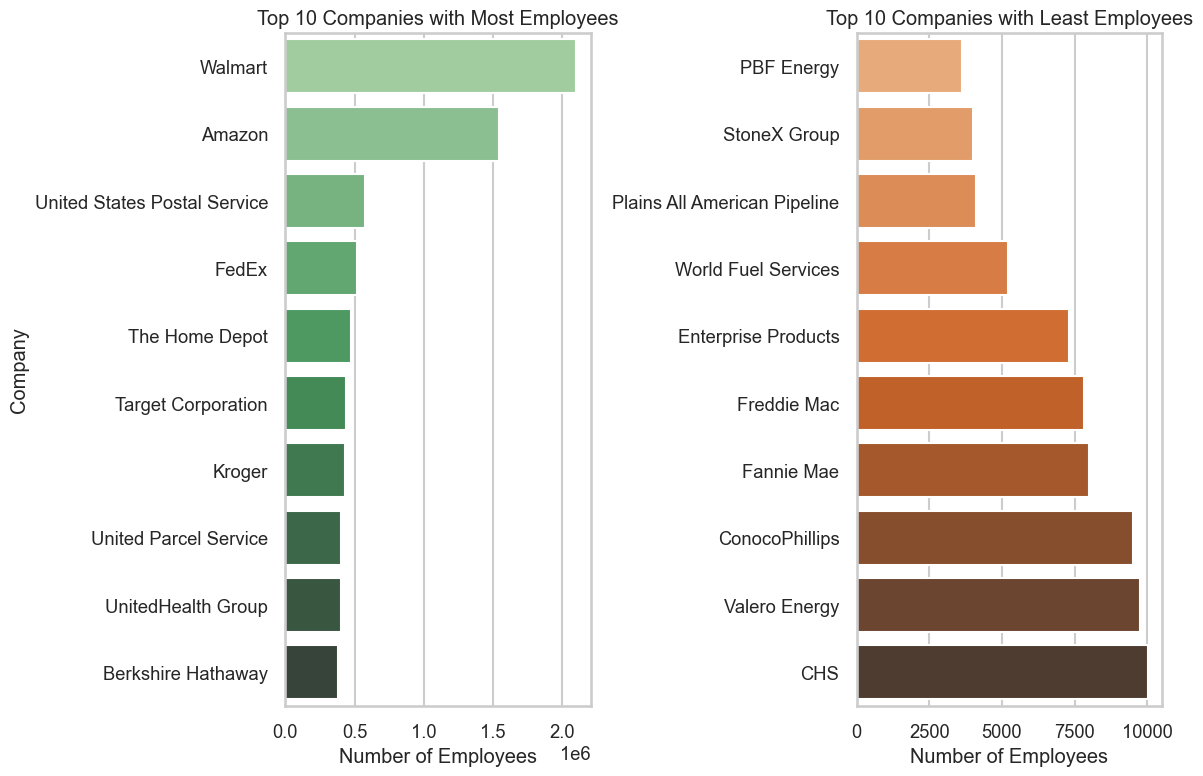

In [19]:
# Sorting the data to find top 10 companies with the most and least employees
top_10_most_employees = df.sort_values('Employees', ascending=False).head(10)
top_10_least_employees = df.sort_values('Employees', ascending=True).head(10)

# Plotting
plt.figure(figsize=(12, 8))

# Plot for top 10 companies with the most employees
plt.subplot(1, 2, 1)
sns.barplot(x='Employees', y='Name', data=top_10_most_employees, palette='Greens_d')
plt.title('Top 10 Companies with Most Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Company')

# Plot for top 10 companies with the least employees
plt.subplot(1, 2, 2)
sns.barplot(x='Employees', y='Name', data=top_10_least_employees, palette='Oranges_d')
plt.title('Top 10 Companies with Least Employees')
plt.xlabel('Number of Employees')
plt.ylabel('')

plt.tight_layout()
plt.show()

> #### The visualizations above compares the top 10 companies with the most employees against the top 10 companies with the least employees.

### *The below graphs provides insight into the top companies in the United States by revenue for the year 2023, segmented by the number of employees. To derive meaningful patterns and relationships, a comparative analysis was conducted focusing on the top 10 companies with the most employees against the top 10 with the least employees, examining two critical financial metrics: revenue and revenue growth percentage.*

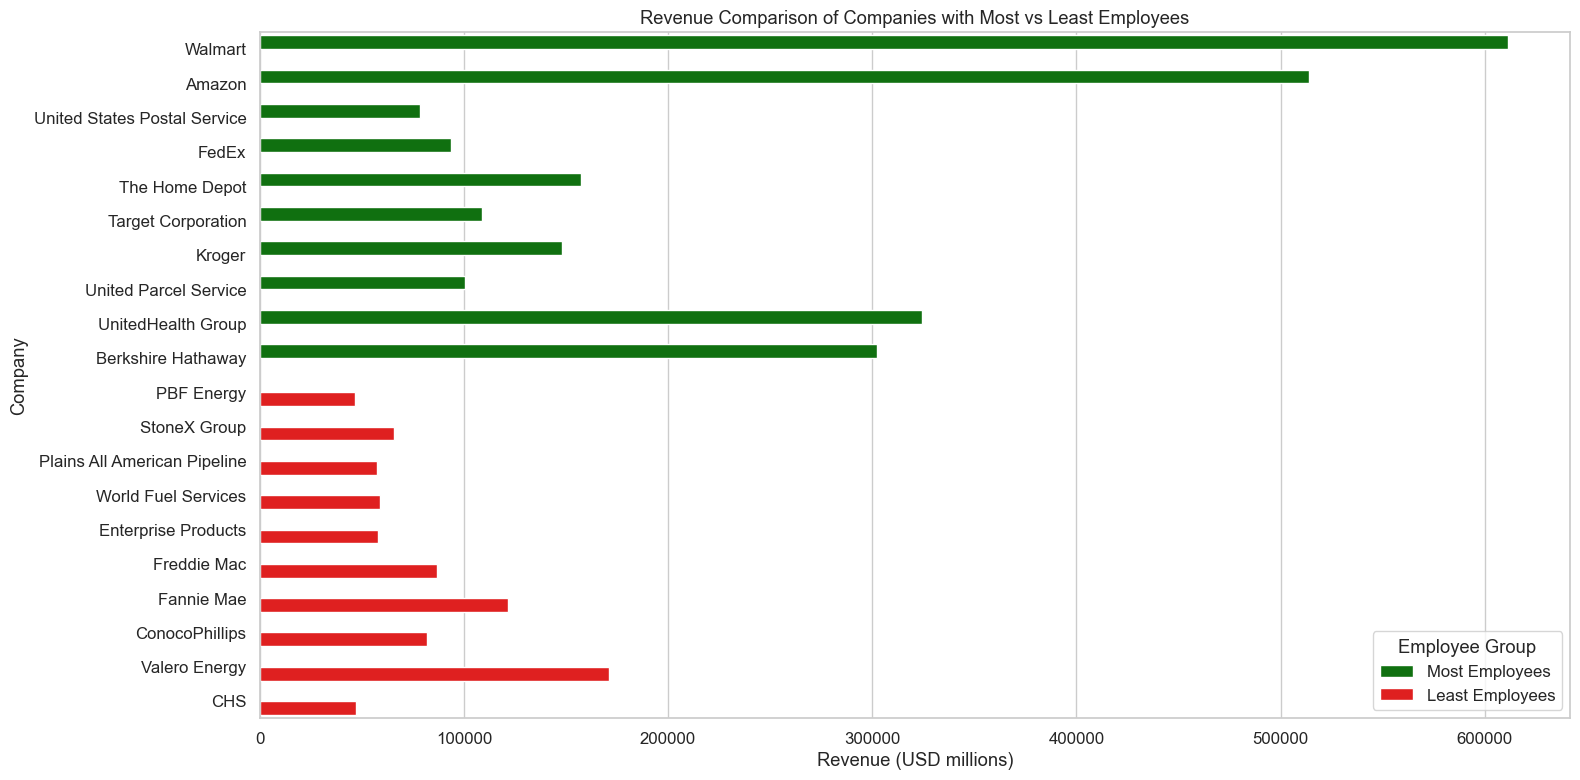

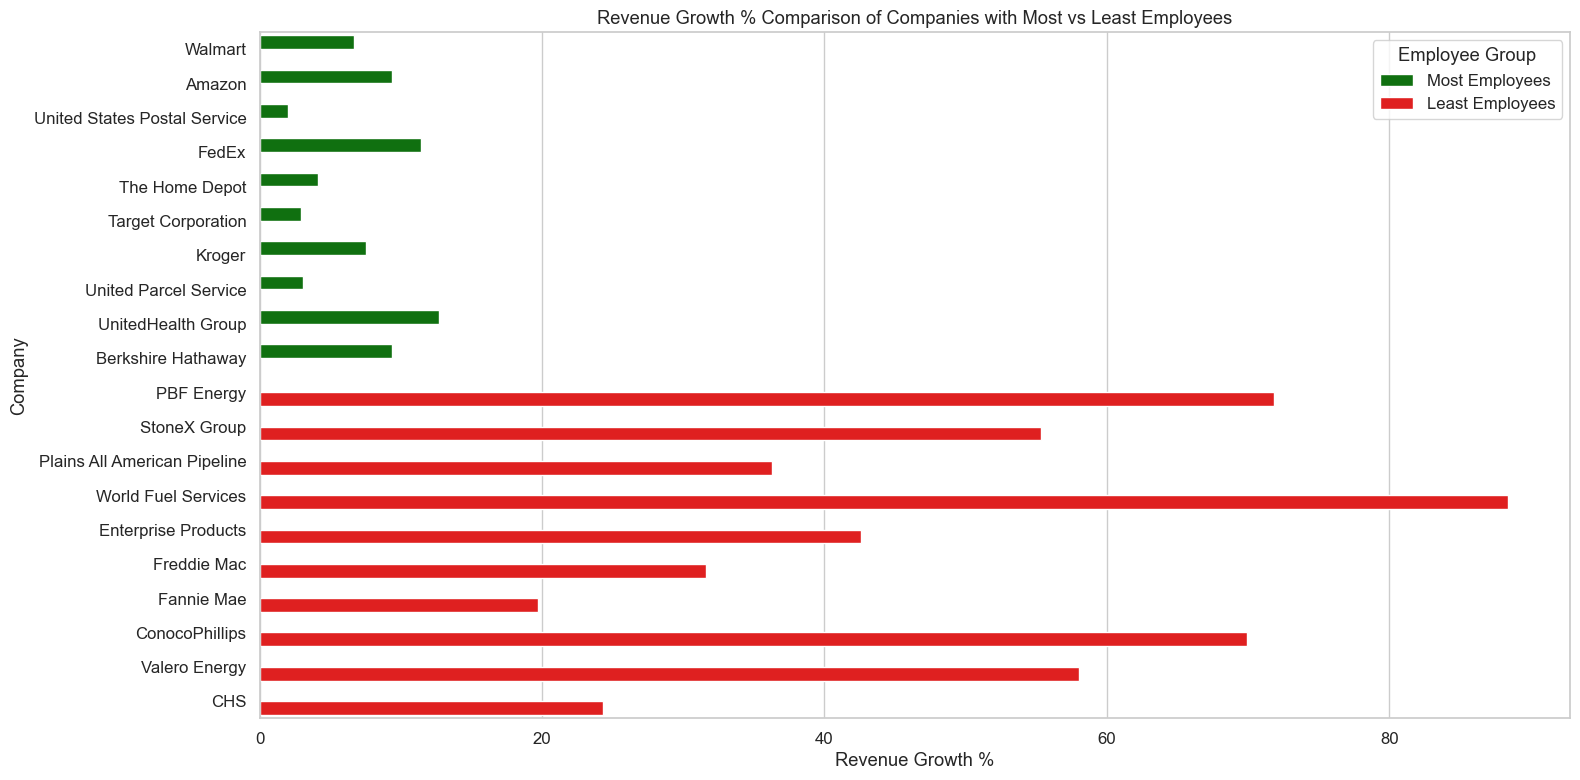

In [20]:
# Sorting the data to find the top 10 companies with the most and least employees
top_10_most_employees = df.sort_values('Employees', ascending=False).head(10)
top_10_least_employees = df.sort_values('Employees', ascending=True).head(10)

# Adding a label to distinguish the two groups
top_10_most_employees['Employee Group'] = 'Most Employees'
top_10_least_employees['Employee Group'] = 'Least Employees'

# Combining the two datasets
combined_employees = pd.concat([top_10_most_employees, top_10_least_employees])

# Setting up the visual style for the plots
sns.set(style="whitegrid")
sns.set_context('notebook', font_scale=1.1)

# Plotting revenue comparison
plt.figure(figsize=(16, 8))
sns.barplot(x='Revenue (USD millions)', y='Name', hue='Employee Group', data=combined_employees, palette=['green', 'red'])
plt.title('Revenue Comparison of Companies with Most vs Least Employees')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Company')
plt.legend(title='Employee Group')
plt.tight_layout()
plt.show()

# Plotting revenue growth comparison
plt.figure(figsize=(16, 8))
sns.barplot(x='Revenue growth %', y='Name', hue='Employee Group', data=combined_employees, palette=['green', 'red'])
plt.title('Revenue Growth % Comparison of Companies with Most vs Least Employees')
plt.xlabel('Revenue Growth %')
plt.ylabel('Company')
plt.legend(title='Employee Group')
plt.tight_layout()
plt.show()

# Findings:
### Revenue Comparison:

-  Among the top 10 companies with the most employees, a trend emerges where companies with larger workforces tend to have higher revenue figures, which could be indicative of the economies of scale and the potential for large workforces to drive extensive operations that contribute significantly to revenue generation.
-  In contrast, the top 10 companies with the least employees show a different dynamic. These companies, while smaller in workforce size, still manage to generate substantial revenue, suggesting high levels of operational efficiency, a focus on high-margin industries, or significant automation and technology leverage.


### Revenue Growth Percentage Comparison:

*  The analysis of revenue growth percentage revealed a more nuanced picture. Some companies with larger workforces demonstrated robust growth rates, suggesting successful expansion strategies or entry into growing markets.
*  Conversely, a few companies with fewer employees also showed impressive growth percentages, possibly reflecting agile market adaptation, innovation, or successful exploitation of niche markets.

# Conclusions:
The comprehensive analysis of the top companies by the number of employees juxtaposed with their revenue and revenue growth percentage uncovers several key insights:

### Scale vs. Efficiency:
Large employee counts can correlate with high revenue, potentially due to the expansive operational capabilities that a large workforce provides. However, it is not a sole indicator of financial success, as companies with fewer employees can achieve similar or even greater revenue efficiency.

### Industry Implications:
The industry in which a company operates plays a significant role in the relationship between workforce size and financial performance. For instance, technology companies can achieve high revenues with relatively smaller employee numbers compared to traditional retail businesses.

### Growth Dynamics:
High revenue growth percentages are observed across companies regardless of their size, indicating that growth is driven by factors beyond workforce size, such as market demand, innovation, strategic leadership, and potentially the business lifecycle stage.

### Strategic Implications for Business:
A larger workforce does not inherently constrain a company's ability to grow. Strategic investments in employee productivity and market expansion can yield significant growth. Conversely, smaller companies can achieve exceptional growth by leveraging technology, entering high-growth markets, or through efficient business models.


*<span style="font-size:1.3em;color:gold;"> This analysis underscores that while the number of employees is a critical operational aspect, it is the strategic business decisions and market conditions that ultimately dictate revenue outcomes and growth potential. Companies of all sizes have the opportunity to thrive by aligning their workforce strategies with their broader business objectives and market dynamics.*
 </span>